# Risk, Profitability, and Returns

### Risk and Profitability

Bonds: Offer an avg rate of return of 3% (historically gvmts don't usually go bankrupt and become unable to pay these back) <br><br>
Stocks (Equity Shares): Typically offer closer to 6%, but have higher price changes/fluctuations due to severeal factors
- Higher returns tend to come at a higher risk

The art of finance is all about balancing risk and return to optimize for a better risk/reward ratio

### Calculating the Return of a Single Investment
If you wanted to compare returns of different investments (say investing in aapl over msft), since the stocks have differing prices, comparing the absolute values of profit aren't as useful as the percentage rate of return (specifically the 'simple rate of return'). This is calculated by: (ending price - beginning price)/beginning price

- For example, say you buy a share of aapl for $116 and then sell it a year later at $132, the rate of return = (132-116)/116 = 13.79% increase

Logarithmic rate of return is log(ending price/beginning price) which is also equal to log(ending price) - log(beginning price)
- For example, log(132) - log(116) = 5.55%

Since simple returns and log returns yield slightly different results, be sure to stay consistent everywhere you calculate returns

Which to use?
- Simple when dealing with multiple assets over the same timeframe
- Log when making calculations about a single asset over time

Always remember the timeframe a rate of return is over
- Investments with different holding periods should not be compared
- To convert a daily, monthly, etc to an annual return: 100(daily_return + 1)^365

Historical and Expected
- Since we can't actually predict the future, we have to use something else as a proxy for what will come. This is known as expected return.
- Expected return is based on past behavior

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib as plt

ticker = yf.download('PG', start='1995-1-1', auto_adjust=False)
ticker.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG,PG
Date,,,,,,
1995-01-03,7.350251,15.59375,15.62500,15.43750,15.46875,3318400
1995-01-04,7.291331,15.46875,15.65625,15.31250,15.53125,2218800
1995-01-05,7.188222,15.25000,15.43750,15.21875,15.37500,2319600
1995-01-06,7.202950,15.28125,15.40625,15.15625,15.15625,3438000
1995-01-09,7.173491,15.21875,15.40625,15.18750,15.34375,1795200


In [ ]:
ticker.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG,PG
Date,,,,,,
2025-06-24,160.360001,160.360001,161.740005,159.649994,161.179993,7470100
2025-06-25,158.970001,158.970001,160.339996,158.710007,159.820007,5933700
2025-06-26,158.630005,158.630005,159.559998,157.169998,159.550003,7410400
2025-06-27,159.860001,159.860001,160.130005,158.289993,158.679993,19256200
2025-06-30,159.285004,159.285004,159.899994,159.029999,159.259995,1400496


### Simple Rate of Return
$\Huge \frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1$

In [ ]:
# Pandas allows you to treat columns as whole units (vectors) instead of having to loop through each row in a dataset
ticker['simple_return'] = (ticker['Adj Close'] / ticker['Adj Close'].shift(1) - 1) # shift moves each row in a column by the parameter amount
ticker['simple_return']

,simple_return
Date,
1995-01-03,NaN
1995-01-04,-0.008016
1995-01-05,-0.014141
1995-01-06,0.002049
1995-01-09,-0.004090
...,...
2025-06-24,-0.004161
2025-06-25,-0.008668
2025-06-26,-0.002139


<Axes: xlabel='Date'>

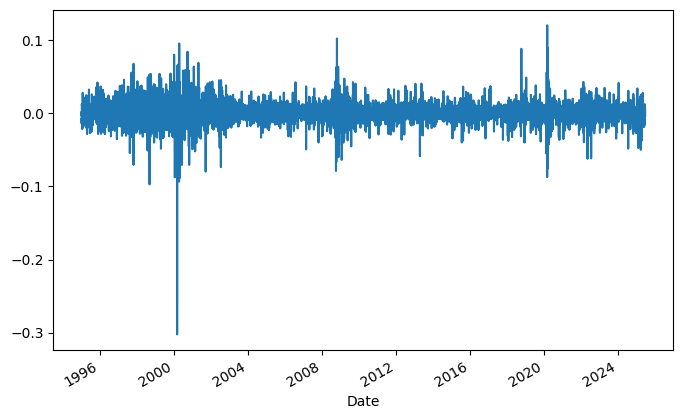

In [ ]:
ticker['simple_return'].plot(figsize=(8, 5))

In [ ]:
average_daily_return = ticker['simple_return'].mean()
print(average_daily_return)

0.0004971789292302535


In [ ]:
average_annual_return = ticker['simple_return'].mean() * 250 # since our data is only M-F excluding holidays - note: 250 is still an appx number
print(average_annual_return)
print('or')
print(f'{round(average_annual_return, 4) * 100} %')

0.12429473230756338
or
12.43 %


### Log Returns
$ \Huge \ln{\frac{P_t}{P_{t-1}}} $

In [ ]:
# Notice that we are again taking advantage of the vector-like nature of np arrays by applying expressions across whole columns
ticker['log_return'] = np.log(ticker['Adj Close'] / ticker['Adj Close'].shift(1))
print(ticker['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2025-06-24   -0.004169
2025-06-25   -0.008706
2025-06-26   -0.002141
2025-06-27    0.007724
2025-06-30   -0.003603
Name: log_return, Length: 7674, dtype: float64


<Axes: xlabel='Date'>

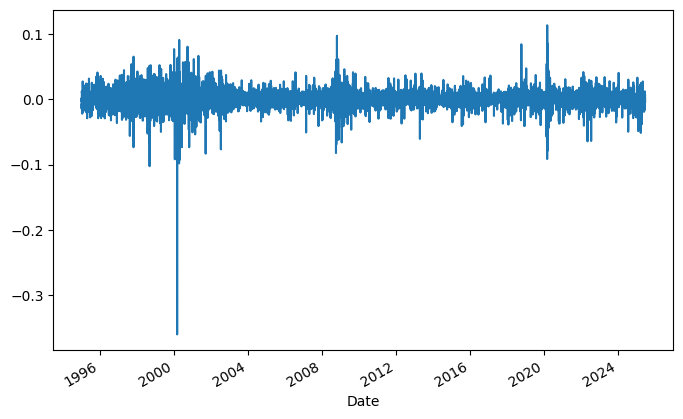

In [ ]:
ticker['log_return'].plot(figsize=(8,5))

In [ ]:
daily_log_return = ticker['log_return'].mean()
print(daily_log_return)

0.00040088109594346835


In [ ]:
annual_log_return = ticker['log_return'].mean() * 250
print(annual_log_return)

0.1002202739858671


In [ ]:
print(str(round(annual_log_return, 5) * 100) + ' %')

10.022 %


### Calculating the rate of return of a portfolio
Imagine you have an evenly-weighted (meaning same amount of shares of each stock) portfolio of AAPL, IBM, GE, and F, each with the following rates of return:
- AAPL: 0.318524
- IMB: 0.153581
- GE: 0.116717
- F: 0.126224

To calculate the rate of return of the portfolio, you find the sum of (the rate of return of each stock * its weight in the portfolio): <br>

0.318524 * .25 = 0.079631 <br>
0.153581 * .25 = 0.038395 <br>
0.116717 * .25 = 0.029179 <br>
0.126224 * .25 = 0.031556 <br>
<br>
0.079631 + 0.038395 + 0.029179 + 0.031556 = 0.178761 <br>
or <br>
17.8761%

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib as plt

tickers = ['PG', 'MSFT', 'F', 'GE']
data = pd.DataFrame()
for t in tickers:
    data[t] = yf.download(t, start='1995-1-1', auto_adjust=False)['Adj Close']
data.info()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7674 entries, 1995-01-03 to 2025-06-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7674 non-null   float64
 1   MSFT    7674 non-null   float64
 2   F       7674 non-null   float64
 3   GE      7674 non-null   float64
dtypes: float64(4)
memory usage: 299.8 KB


In [ ]:
data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.350250,2.305954,3.407052,20.163143
1995-01-04,7.291332,2.322716,3.498722,20.163143
1995-01-05,7.188221,2.284404,3.468165,20.212555
1995-01-06,7.202951,2.322716,3.468165,20.113728
1995-01-09,7.173484,2.308348,3.529277,19.916050


In [ ]:
data.tail()

,PG,MSFT,F,GE
Date,,,,
2025-06-24,160.360001,490.109985,10.73,248.750000
2025-06-25,158.970001,492.269989,10.48,249.899994
2025-06-26,158.630005,497.450012,10.63,251.000000
2025-06-27,159.860001,495.940002,10.80,254.509995
2025-06-30,159.285004,496.220001,10.71,256.489990


### Normalization to 100:
$ \Huge {\frac{P_t}{P_0}} * 100 $
<br>
<br>
This allows us to compare each stock as if they started at the same value (100)

In [ ]:
data.iloc[0] # Gets the first row of data

,1995-01-03
PG,7.350250
MSFT,2.305954
F,3.407052
GE,20.163143


<Axes: xlabel='Date'>

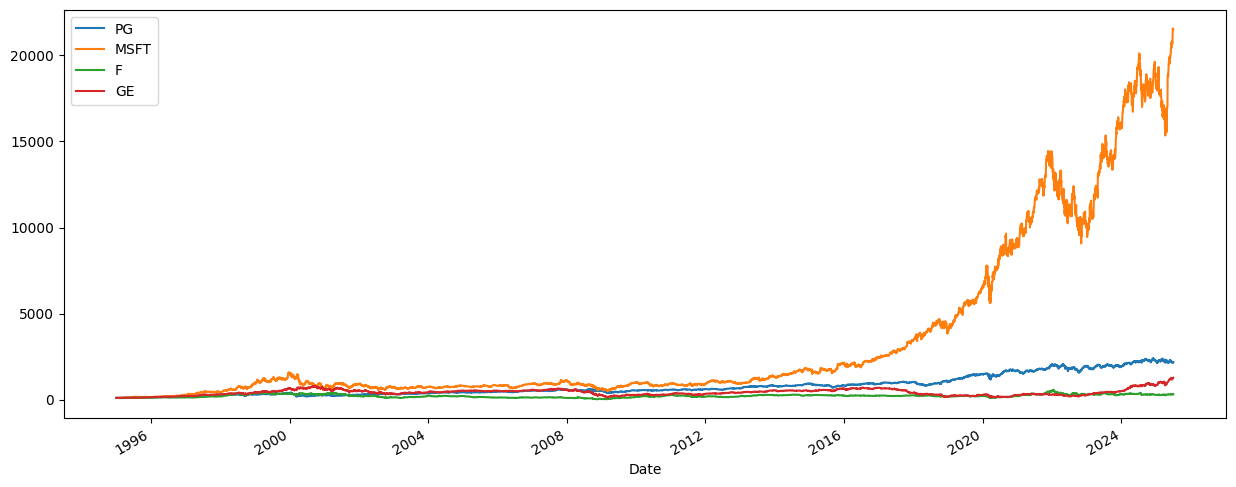

In [ ]:
# Normalized to 100
(data / data.iloc[0] * 100).plot(figsize=(15, 6))

<Axes: xlabel='Date'>

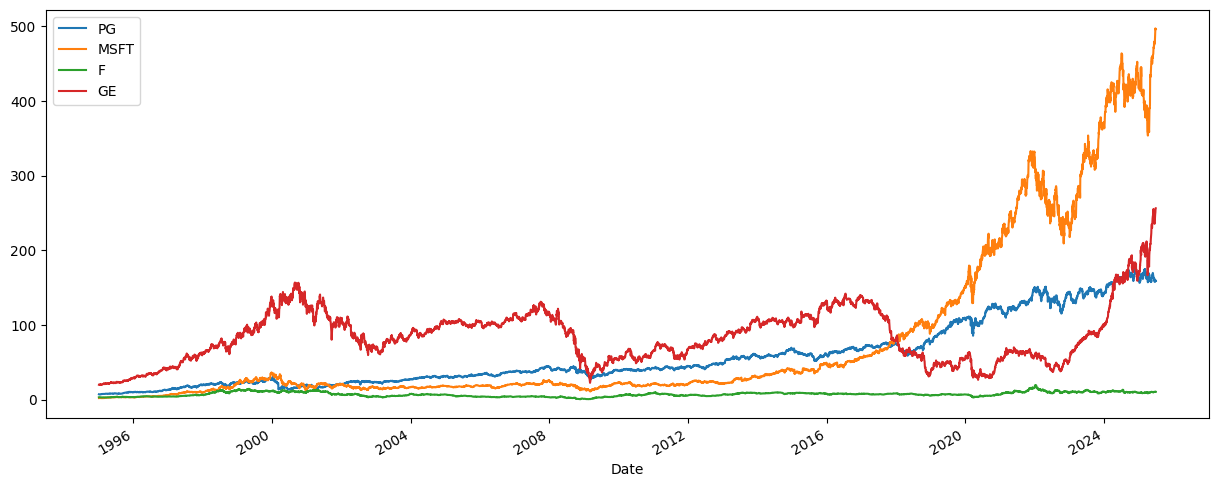

In [ ]:
# Not normalized
data.plot(figsize=(15, 6))

### Calculating the Portfolio's Returns

In [ ]:
# First we calc the returns for each stock
returns = (data / data.shift(1)) - 1 # Remember, simple return is preferred over log returns when comparing multiple stocks
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004889
1995-01-09,-0.004091,-0.006186,0.017621,-0.009828


In [ ]:
# Next we initialize the weights and show a dot product
weights = np.array([.25, .25, .25, .25])
np.dot(returns, weights) # calculates vector or matrix products

array([        nan,  0.00653991, -0.00922988, ...,  0.0067747 ,
        0.00867372, -0.0008965 ])

In [ ]:
# Find the average of the returns and
# multiply by the appx trading days in a year for annual return
annual_returns = returns.mean() * 250
annual_returns

,0
PG,0.124295
MSFT,0.222777
F,0.117098
GE,0.133839


In [ ]:
# calculate the total portfolio return by multiplying the
# annual returns by it's weights
portfolio_1 = round((np.dot(annual_returns, weights) * 100), 2)
print(str(portfolio_1) + ' %')

14.95 %


In [ ]:
# What if we didn't weight each stock evenly?
weights_2 = np.array([.4, .4, .15, .05])
portfolio_2 = round((np.dot(annual_returns, weights_2) * 100), 2)
print(str(portfolio_2) + ' %')

16.31 %


### Market Index:
A good proxy for the development of a given market <br><br>
Top 3 US Indices:
- SP500
    - 500 largest listed US companies
    - Diverse constituency
    - True approximation of the US stock market
    - Market-cap-weighted
- DJI
    - 30 large public stocks
    - One of the historically oldest indeces
    - NOT a true representation of the US stock market
    - Equally weighted
- NASDAQ
    - Grouped securities
    - Mostly IT companies
    - Shows the rate of return of tech stocks
<br><br>

Foreign Stock Indeces:
- FTSE 100: UK
- DAX 30: Germany
- Nikkei 225: Japan
- SSE: China
<br><br>


Global Indeces:
- MSCI
    - Includes stocks from all developed markets in the world
<br><br>

Stock indices are excellent comparators to understand how your own stocks are performing. They also indicate what to expect if you invest in a diversified portfolio within that market.

In [ ]:
# This time we use indices instead of individual stocks:
# S&P500, NASDAQ, German DAX, and London FTSE
tickers = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE']

indices_data = pd.DataFrame()

for t in tickers:
    indices_data[t] = yf.download(t, start='1997-1-1', auto_adjust=False)['Adj Close']
indices_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4057.399902
1997-01-03,748.030029,1310.680054,2863.260010,4089.500000
1997-01-06,747.650024,1316.400024,2890.199951,4106.500000
1997-01-07,753.229980,1327.729980,2876.340088,4078.800049
1997-01-08,748.409973,1320.349976,2904.080078,4087.500000


In [ ]:
indices_data.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2025-06-24,6092.180176,19912.529297,23641.580078,8759.000000
2025-06-25,6092.160156,19973.550781,23498.330078,8718.799805
2025-06-26,6141.020020,20167.910156,23649.300781,8735.599609
2025-06-27,6173.069824,20273.460938,24033.220703,8798.900391
2025-06-30,6188.000000,20323.314453,23872.919922,8767.190430


<Axes: xlabel='Date'>

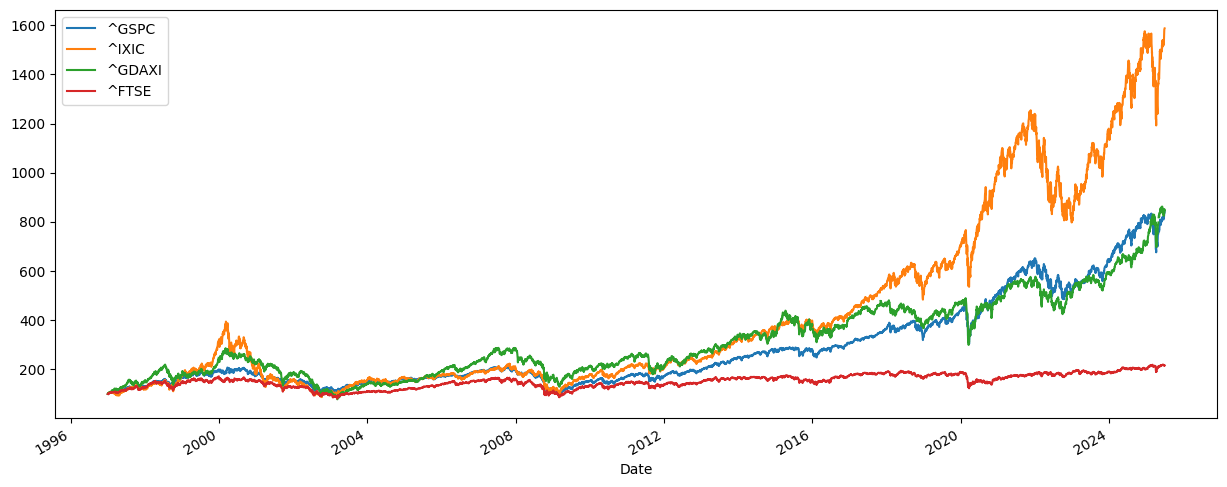

In [ ]:
(indices_data / indices_data.iloc[0] * 100).plot(figsize=(15, 6))

In [ ]:
indices_returns = (indices_data / indices_data.shift(1)) - 1
indices_returns.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2025-06-24,0.011122,0.014343,0.016011,0.000114
2025-06-25,-0.000003,0.003064,-0.006059,-0.004590
2025-06-26,0.008020,0.009731,0.006425,0.001927
2025-06-27,0.005219,0.005234,0.016234,0.007246
2025-06-30,0.002419,0.002459,-0.006670,-0.003604


In [ ]:
annual_indices_returns = indices_returns.mean() * 250
annual_indices_returns

NameError: name 'indices_returns' is not defined

In [ ]:
tickers = ['PG', '^GSPC', '^DJI']

data_2 = pd.DataFrame()
for t in tickers:
    data_2[t] = yf.download(t, start='1997-1-1', auto_adjust=False)['Adj Close']

data_2.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PG,^GSPC,^DJI
Date,,,
2025-06-24,160.360001,6092.180176,43089.019531
2025-06-25,158.970001,6092.160156,42982.429688
2025-06-26,158.630005,6141.020020,43386.839844
2025-06-27,159.860001,6173.069824,43819.269531
2025-06-30,159.270004,6188.149902,43967.660156


<Axes: xlabel='Date'>

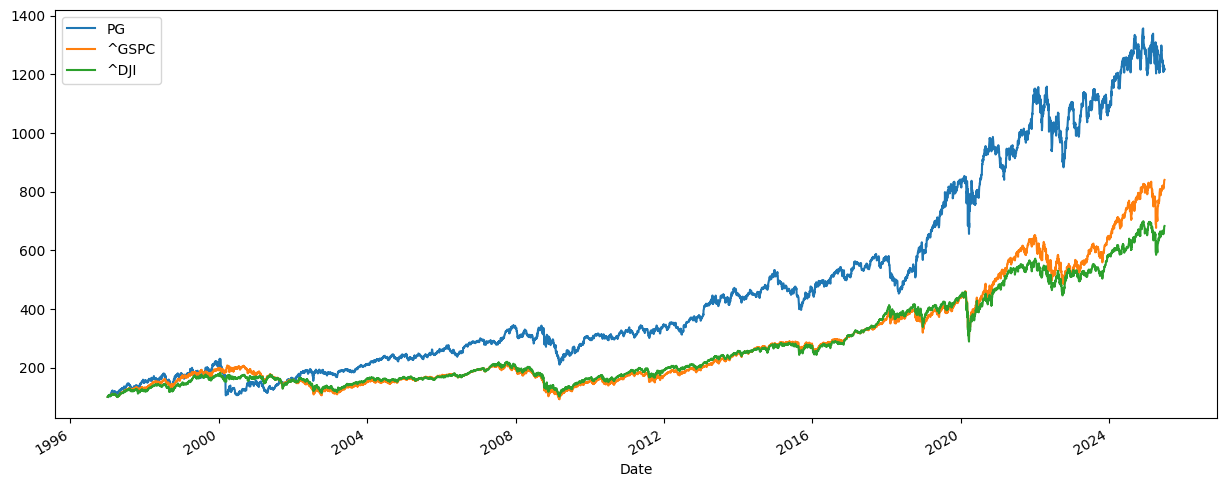

In [ ]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6))

### Beta Coefficient
This wasn't in any of the videos/readings, but it's on the test so here's what I learned from chatGPT:

In finance theory, the beta coefficient measures a security's systematic risk relative to the overall market. Specifically:
- Volatility relative to the market: a beta of 1 means the security's price tends to move in line with the market
- Market sensitivity: A beta greater than 1 implies the asset is more volatile than the market and a beta less than 1 implies the asset is less volatile
- Undiversifiable risk: Beta reflects the portion of risk that cannot be eliminated through diversification